# **Фигуры Лиссажу** 

---

Прямая и обратная задачи моделирования 







In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from PIL import Image
from PIL import ImageFilter, ImageChops
import imageio
from os import makedirs
from shutil import rmtree

max_value = 11
Threshold = 155

In [ ]:
def generate_graph(f1, f2, shift=0, save_path=None):
    X = np.linspace(0, 2*np.pi, 1000)
    W = np.sin(X*f1 + 0) 
    Y = np.sin(X*f2 + shift)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(W, Y)
    plt.axis('off')
    plt.show()
    if save_path: fig.savefig(save_path)

freqs = []
freqs_set = []
for i in range(1, max_value):
    for j in range(1, max_value):
      if i / j not in freqs_set and  j / i not in freqs_set:
        freqs.append([i, j])
        freqs_set.append(i / j)
configs = [[pair[0], pair[1], shift] for shift in [0, np.pi/4, np.pi/2] for pair in freqs] # 96 records

Если подходить к задаче классификации напрямую, необходимо бы было создать достаточный датасет на каждый из <code>96</code> меток классов. \
Непонятно, как строить выборку, ведь после генерации картин (графиков) центральных классов заполнение датасета будет производиться только с промежуточными значениями сдвига по фазе и со значениями конфигурации частот.


at least 2500 images of 96 basic records would take 11.444091796875 GB


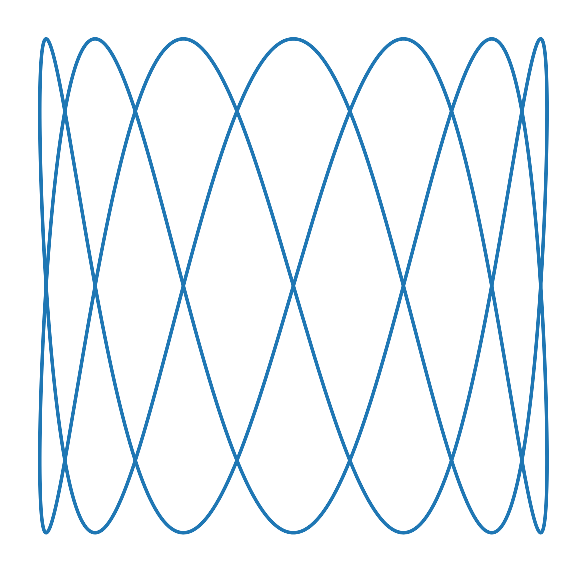

In [ ]:
print(f'at least 2500 images of 96 basic records would take '
      f'{50 * 96 * 2500 / 2 ** 20} GB')
generate_graph(4, 14, np.pi/2, "./curve")

In [ ]:
def get_binary_image(img_path, threshold, target_path='./test.bmp'):
    image = np.array(Image.open(img_path).convert('L'))
    imageio.imwrite(target_path, get_binary_array(image, threshold))

def get_binary_array(numpy_array, threshold=200):
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            numpy_array[i][j] = 255 if numpy_array[i][j] > threshold else 0
    return numpy_array

def get_frequency_max(img_path, target_path='./test.bmp', threshold=Threshold):
    get_binary_image(img_path, threshold)
    image_array = np.array(Image.open(img_path))
    max_row_count, max_column_count = 0, 0
    for i in range(len(image_array)):
        temp_string_horizontal, temp_string_vertical = "", ""
        for j in range(len(image_array[0])):
            if all(image_array[i][j] == 255):
                temp_string_horizontal += "1"
            else:
                temp_string_horizontal += "0"
            if all(image_array[j][i] == 255):
                temp_string_vertical += "1"
            else:
                temp_string_vertical += "0"
        max_column_count = max(max_column_count, int((temp_string_vertical.count("01") + temp_string_vertical.count("10")) / 2))
        max_row_count = max(max_row_count, int((temp_string_horizontal.count("01") + temp_string_horizontal.count("10")) / 2))
    gcd = math.gcd(max_column_count, max_row_count)
    return max_column_count / gcd, max_row_count / gcd

In [ ]:
img_path = "./curve.png"
frequency_answer = get_frequency_max(img_path)
print(f'Frequencies for image from {img_path} is {frequency_answer}')

Frequencies for image from ./curve.png is (2.0, 7.0)


**Классы:**

0. 2500 экземпляров для $\phi \in [0, \: \frac{\pi}{4}]$
1. 2500 экземпляров для $\phi \in (\frac{\pi}{4}, \: \frac{\pi}{2}]$
2. 2500 экземпляров для $\phi \in (\frac{\pi}{2}, \: \frac{3\pi}{4}]$
3. 2500 экземпляров для $\phi \in (\frac{3\pi}{4}, \: \pi]$



In [ ]:
%matplotlib agg
def make_samples():
    class_names = [0, 1, 2, 3]
    N = 20
    init_phi = 0
    for class_name in class_names:
        makedirs(f'./data/{class_name}', exist_ok=True)
        cnt = 0
        for phi in np.linspace(init_phi, init_phi + np.pi / 4, N):
            generate_graph(frequency_answer[0], frequency_answer[1], shift=phi, save_path=f'./data/{class_name}/{cnt}_{class_name}')
            cnt += 1
        init_phi += np.pi / 4

In [ ]:
%matplotlib agg
make_samples()
rmtree("./data")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

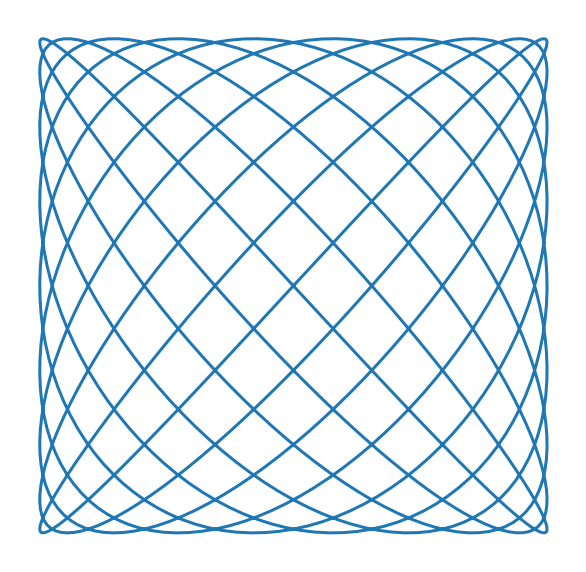

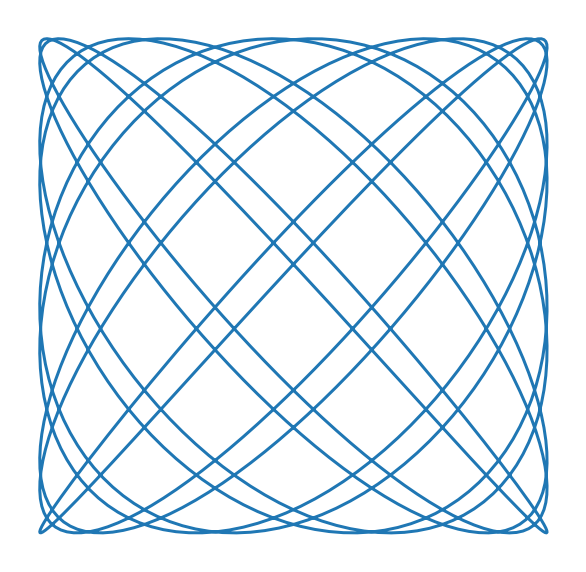

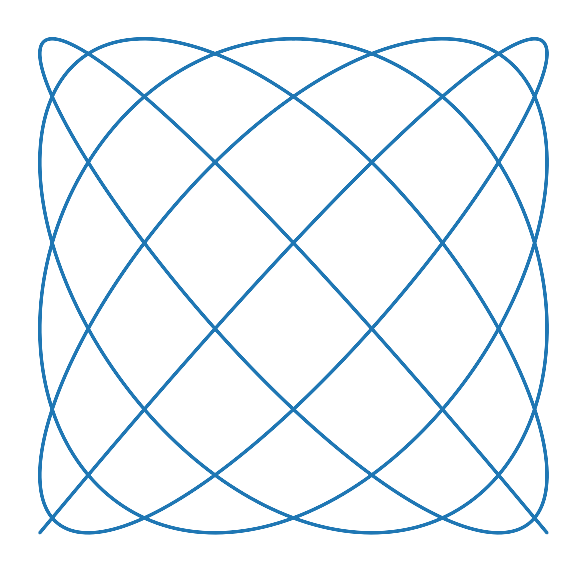

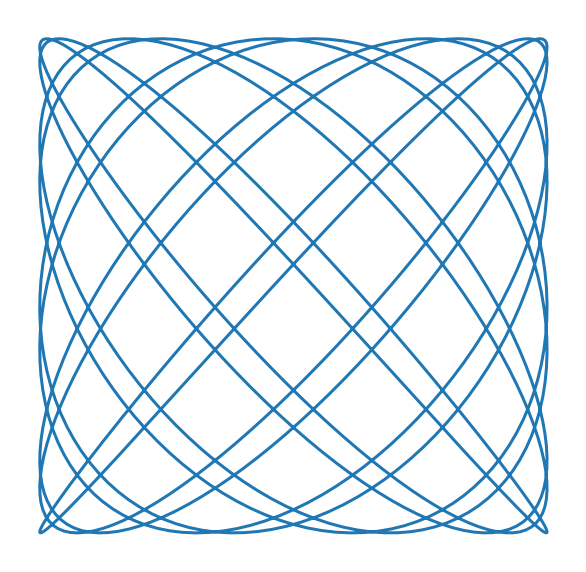

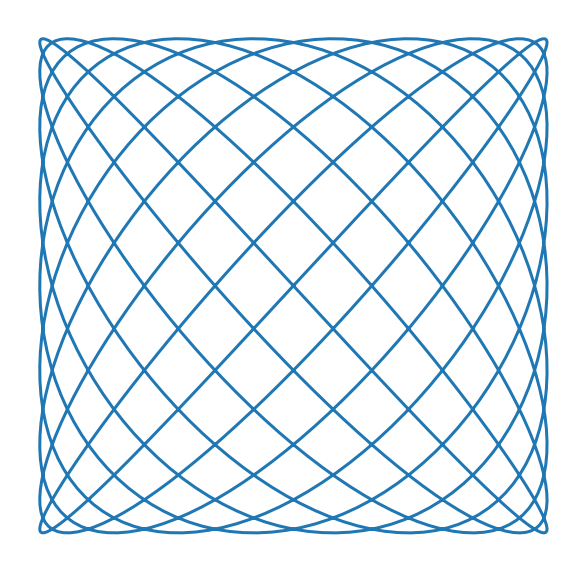

In [ ]:
%matplotlib inline
generate_graph(9, 10)
generate_graph(9, 10, np.pi/4)
generate_graph(9, 10, np.pi/2)
generate_graph(9, 10, 3*np.pi/4)
generate_graph(9, 10, np.pi)